## Sistema de Control Difuso

Consideremos un sistema difuso simple para controlar la potencia de un calefactor basado en la temperatura ambiente. Supongamos que queremos mantener la temperatura en una habitación alrededor de un valor de referencia.

**Definición de las Variables Difusas**
- `Temperatura`: esta variable representa la temperatura medida en grados Celsius. Creamos una variable de entrada temperatura que abarca valores desde 0 hasta 100 grados Celsius.
- `Potencia`: esta variable representa el nivel de potencia de la calefacción. Creamos una variable de salida potencia que también abarca valores desde 0 hasta 100.

**Funciones de Membresía**
- `Temperatura`: se definen tres funciones de membresía para la temperatura: "fría", "templada" y "caliente".
- `Potencia`: de igual forma, se definen tres funciones de membresía para la potencia de la calefacción: "baja", "media" y "alta".

**Reglas difusas**
Se define el sistema de reglas difusas:
- Si la temperatura es fría, entonces la potencia debe ser alta
- Si la temperatura es alta, entonces la potencia debe ser baja
- Si la temperatura es templada, entonces la potencia debe ser media

**Sistema de Control**
Se crea un conjunto de reglas difusas a partir de cada una de las reglas definidas previsamente. Este conjunto de reglas representa el conocimiento difuso que guiará el comportamiento del sistema de control.

**Controlador Difuso**
Se crea un controlador difuso que toma como argumento el sistema de control difuso creado anteriormente. Este controlador simula el comportamiento del sistema de control difuso y nos permite introducir valores de entrada (temperatura) para obtener el valor de salida (potencia) correspondiente.

**Simulación**
Se simula un cambio en la temperatura estableciendo un valor para la variable de entrada temperatura en el controlador difuso.
Luego, se calcula el valor de salida (nivel de potencia) utilizando el método compute() del controlador.

Finalmente, el código python:

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definición de las variables de entrada y salida
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
potencia = ctrl.Consequent(np.arange(0, 101, 1), 'potencia')

# Definición de las funciones de membresía para la temperatura
temperatura['fría'] = fuzz.trimf(temperatura.universe, [0, 0, 50])
temperatura['templada'] = fuzz.trimf(temperatura.universe, [0, 50, 100])
temperatura['caliente'] = fuzz.trimf(temperatura.universe, [50, 100, 100])

# Definición de las funciones de membresía para la potencia
potencia['baja'] = fuzz.trimf(potencia.universe, [0, 0, 50])
potencia['media'] = fuzz.trimf(potencia.universe, [0, 50, 100])
potencia['alta'] = fuzz.trimf(potencia.universe, [50, 100, 100])

# Reglas difusas
regla1 = ctrl.Rule(temperatura['fría'], potencia['alta'])
regla2 = ctrl.Rule(temperatura['templada'], potencia['media'])
regla3 = ctrl.Rule(temperatura['caliente'], potencia['baja'])

# Sistema de control difuso
sistema_control = ctrl.ControlSystem([regla1, regla2, regla3])
controlador = ctrl.ControlSystemSimulation(sistema_control)

# Simulación de un cambio en la temperatura
controlador.input['temperatura'] = 25  # Temperatura medida en grados Celsius

# Computar el resultado
controlador.compute()

# Visualización del resultado
print("Nivel de potencia de la calefacción:", controlador.output['potencia'])

Nivel de potencia de la calefacción: 55.95238095238095


A continuación, se representan e interpretan la funciones de membresía antecedente y consecuente del sistema de control:

C:\Users\p_san\anaconda3\envs\apuntes_m2_bayes_difusa\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


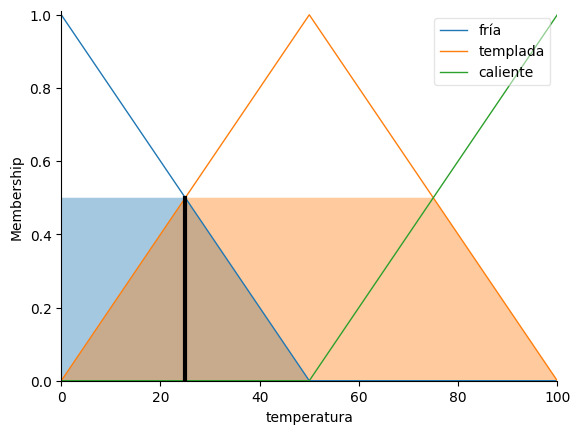

In [2]:
# Detalle de las funciones de membresía (antecedente y consecuente)

temperatura.view(sim=controlador) 

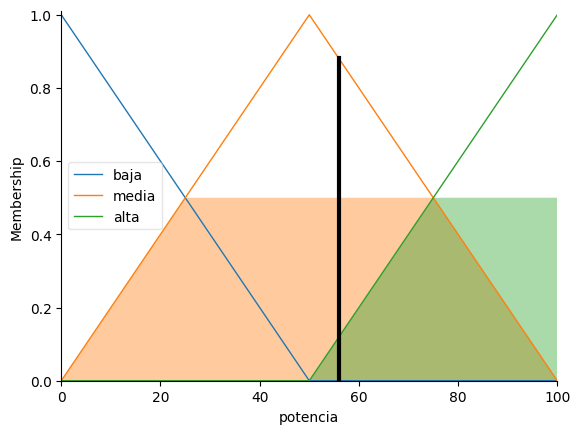

In [3]:
potencia.view(sim=controlador)